# TP4 - Leitura dados e uso de bibliotecas

Bem vindo!
Neste TP você implementará um modelo num problema de regressão, usando bibliotecas prontas.

**Objetivos**
- Aplicar uma rede neural multicamadas num problema real com dados medidos

## O Jupyter notebook

O Jupyter Notebook é um ambiente interativo de programação em uma página web. Nesse notebook você colocará o código entre os comentários `### SEU CÓDIGO COMEÇA AQUI ###` e `### FIM DO CÓDIGO ###`. Após escrever o código, você pode executar a célula com `Shift+Enter` ou no botão "Run" (com símbolo de "play") na barra de comandos acima.

Em alguns trechos será especificado "(≈ X linhas de código)" nos comentários para que você tenha uma ideia sobre o tamanho do código a ser desenvolvido naquele trecho. Lembrando que é só uma estimativa, o seu código pode ficar maior ou menor do que o especificado.

**Alguns atalhos úteis *no código*:**
- `Ctrl+Enter`: executa a célula e mantém o cursor na mesma célula
- `Shift+Enter`: executa a célula e move o cursor para a próxima célula
- `Ctrl+/`: comenta a linha de código
- `Shift+Tab`: quando o cursor estiver em uma função, mostra um HELP da função

**Alguns atalhos úteis *na célula*:**
- Cria nova célula `a`: acima, `b`: abaixo da céula selecionada
- `d` (2x): deleta célula selecionada
- `m`: define célula como texto (Markdown)
- `y`: define célula como código (Python)
- `l`: mostra numeração das linhas na célula de código
- `c`: copiar, `v`: colar, `x`: recortar célula selecionada
- `ctrl+shift+p`: mostra busca para todos comandos de célula

In [ ]:
# Importa bibliotecas
import numpy as np, matplotlib.pyplot as plt
import pandas as pd, seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
%matplotlib inline
keras.__version__

## Leitura dos dados

Nessa seção, você deve estar na mesma pasta dos dados "Communities and Crime Data Set", disponível em https://archive.ics.uci.edu/ml/datasets/wine+quality. Arquivos:

- `winequality.names`
- `winequality-red.csv`
- `winequality-white.csv`

O código abaixo importa os dados dos arquivos acima.

In [2]:
# faz leitura dos arquivos .csv
tinto = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
branco = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')
# apresenta algumas métricas sobre os dados
tinto.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
# apresenta primeiros valores dos dados
tinto.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# # Código para visualização dos dados
# # Boxplot
# tinto.plot.box(vert=False);
# # Matriz de pontos
# pd.plotting.scatter_matrix(tinto, figsize=(15,15));

In [5]:
# parâmetros para coleta dos dados
tr_perc = .8 # percentual de dados para treinamento

# Lê quantidade de dados totais e de treinamento
Ntot, nx = tinto.iloc[:,:-1].shape #qtd total amostras, qtd entradas
N = int(Ntot*.8) #qtd dados treinamento

# calcula parâmetros de normalização: média e variância
normaliza = StandardScaler() #inicia
normaliza.fit(tinto.iloc[:,:-1]) #usa TODOS os dados (train e valid)

# embaralha amostras
dadosEmb = shuffle(tinto) #função da biblioteca 'sklearn.utils'

# Atribui dados em X e Y (treinamento)
X = dadosEmb.iloc[:N,:-1].values #[amostras, features]
X = normaliza.transform(X) #normaliza dados
Y = dadosEmb.iloc[:N,-1].values #[amostras, features]

# Normaliza dados de treinamento!
# X, Xnorms = normalize(X, axis=0, return_norm=True)

# Atribui dados em X e Y (validação)
X_val = dadosEmb.iloc[N:,:-1].values #[amostras, features]
X_val = normaliza.transform(X_val) #normaliza dados
Y_val = dadosEmb.iloc[N:,-1].values #[amostras, features]

___
## Modelo neural e treinamento

In [ ]:
# Inicializa modelo da rede neural
rede = Sequential()

### IMPLEMENTE AQUI A REDE NEURAL ###

# use essas métricas! ['accuracy', 'mse']
rede.compile(metrics=['accuracy', 'mse'])
rede.summary()

In [ ]:
# treina modelo!
EPOCAS = 1

### IMPLEMENTE AQUI O TREINAMENTO DA REDE NEURAL ###
treinamento = rede.fit(X, Y, epochs=EPOCAS);


___
## Desempenho no treinamento da rede

320/320 [==============================] - 0s 38us/step
Loss MSE: 0.2122 (train);  0.9968 (val)
Acurácia: 0.8937 (train);  0.5750 (val)


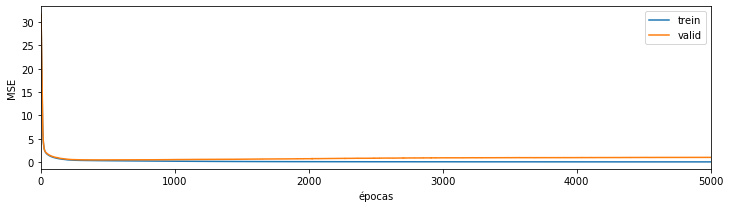

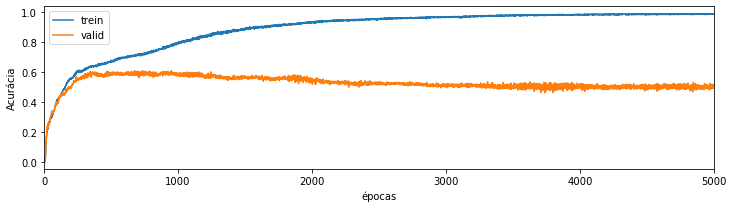

In [8]:
# avalia desempenho nos dados de treinamento e validação
tr_loss, tr_ac, tr_mse = rede.evaluate(X, Y)
val_loss, val_ac, val_mse = rede.evaluate(X_val, Y_val)

# mostra os dados de desempenho
print('Loss MSE: %.4f (train);  %.4f (val)'%(tr_loss, val_loss))
print('Acurácia: %.4f (train);  %.4f (val)'%(tr_ac, val_ac))

# Gráfico do MSE
plt.figure(figsize=(12,3))
plt.plot(treinamento.history['mse'])
plt.plot(treinamento.history['val_mse'])
plt.ylabel('MSE')
plt.xlabel('épocas')
plt.legend(('trein','valid'))
plt.xlim((0, EPOCAS))

# Gráfico de acurácia
plt.figure(figsize=(12,3))
plt.plot(treinamento.history['accuracy'])
plt.plot(treinamento.history['val_accuracy'])
plt.ylabel('Acurácia')
plt.xlabel('épocas')
plt.legend(('trein','valid'))
plt.xlim((0, EPOCAS));

___
## Avaliação nos dados de validação

O código abaixo compara a saída da rede nos dados de validação. Quanto mais próximo da reta melhor.

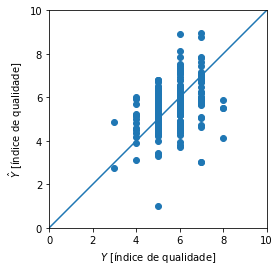

In [9]:
# FAZ A PREDIÇÃO NOS DADOS DE VALIDAÇÃO
Yh_val = rede.predict(X_val)

plt.axes(aspect='equal')
plt.scatter(Y_val, Yh_val)
plt.xlabel('$Y$ [índice de qualidade]')
plt.ylabel('$\hat{Y}$ [índice de qualidade]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims);

Abaixo temos o histograma dos erros cometidos.

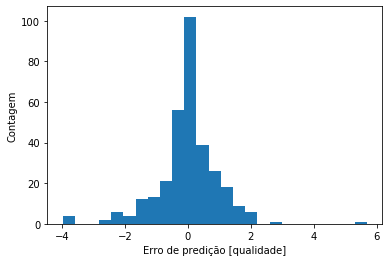

In [10]:
# Histograma dos erros
erros = Yh_val[:,0] - Y_val
plt.hist(erros, bins = 25)
plt.xlabel("Erro de predição [qualidade]")
plt.ylabel("Contagem");

___

# Conclusões

Escreva aqui, em linguagem `markdown`, suas considerações sobre o que foi aprendido nesse trabalho prático.

*### escreva aqui ###*